# credit card defaults

using data from: http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

http://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls

In [1]:
import pandas as pd

In [8]:
!pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 3.0 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [9]:
pdf = pd.read_excel(r"http://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", skiprows=1)

In [10]:
pdf.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
print("rows:",pdf.shape[0]," columns:", pdf.shape[1])


rows: 30000  columns: 25


In [13]:
data_clean = pdf.drop(columns=["ID", "SEX"])
data_clean.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
pd.set_option('display.max_columns', 25)


total = data_clean.isnull().sum()
percent = (data_clean.isnull().sum()\
/data_clean.isnull().count()*100)
pd.concat([total, percent], axis=1, \
keys=['Total', 'Percent']).transpose()


,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#detect outliers
def detect_outliers(data):

    outliers = {}
    for i in range(data.shape[1]):
        min_t = data[data.columns[i]].mean() - (3 * data[data.columns[i]].std())
        max_t = data[data.columns[i]].mean() + (3 * data[data.columns[i]].std())
        count = 0
        for j in data[data.columns[i]]:
            if j < min_t or j > max_t:
                count += 1
        percentage = count / data.shape[0]
        outliers[data.columns[i]] = "%.3f" % percentage

    return outliers

print(detect_outliers(data_clean))

{'LIMIT_BAL': '0.004', 'EDUCATION': '0.011', 'MARRIAGE': '0.000', 'AGE': '0.005', 'PAY_0': '0.005', 'PAY_2': '0.005', 'PAY_3': '0.005', 'PAY_4': '0.006', 'PAY_5': '0.005', 'PAY_6': '0.004', 'BILL_AMT1': '0.023', 'BILL_AMT2': '0.022', 'BILL_AMT3': '0.022', 'BILL_AMT4': '0.023', 'BILL_AMT5': '0.022', 'BILL_AMT6': '0.022', 'PAY_AMT1': '0.013', 'PAY_AMT2': '0.010', 'PAY_AMT3': '0.012', 'PAY_AMT4': '0.013', 'PAY_AMT5': '0.014', 'PAY_AMT6': '0.015', 'default payment next month': '0.000'}


In [20]:
#check class imbalance
target = data_clean["default payment next month"]
yes = target[target == 1].count()
no = target[target == 0].count()
print("yes %: " + str(yes/len(target)*100) + " - no %: " + str(no/len(target)*100))

yes %: 22.12 - no %: 77.88000000000001


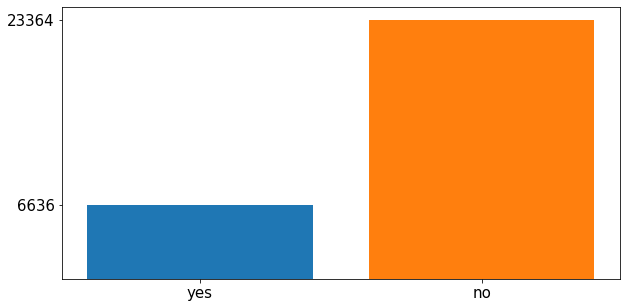

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
plt.bar("yes", yes)
plt.bar("no", no)
ax.set_yticks([yes,no])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [22]:
#train test split
#split, then over sample for train then you can fit scaler and scale
#doing it any other way creates data leakage
Y = data_clean["default payment next month"]
X = data_clean.drop(["default payment next month"], axis = 1)

from sklearn.model_selection import train_test_split

x_new, x_test_2, y_new, y_test_2 = train_test_split(X, Y, stratify = Y, test_size=0.2, random_state=0)
dev_per = x_test_2.shape[0]/x_new.shape[0]
x_train_2, x_dev_2, y_train_2, y_dev_2 = train_test_split(x_new, y_new, stratify = y_new, test_size=dev_per, random_state=0)

print(x_train_2.shape, y_train_2.shape)
print(x_dev_2.shape, y_dev_2.shape)
print(x_test_2.shape, y_test_2.shape)

(18000, 22) (18000,)
(6000, 22) (6000,)
(6000, 22) (6000,)


In [23]:
#scale data
x_dev_2_scaled = (x_dev_2 - x_train_2.min()) / (x_train_2.max() - x_train_2.min())
x_test_2_scaled = (x_test_2 - x_train_2.min()) / (x_train_2.max() - x_train_2.min())
x_train_2_scaled = (x_train_2 - x_train_2.min()) / (x_train_2.max() - x_train_2.min())



In [30]:
#over sampling
def oversample(df, target):
    df_no = df[df[target] == 0]
    df_yes = df[df[target] == 1]    
    
    x_no_rows = df_no.shape[0]
    x_yes_rows = df_yes.shape[0]
    
    if x_no_rows < x_yes_rows:
        sample_rows = x_yes_rows - x_no_rows
        samples = df_no.sample(n = sample_rows, replace = True, random_state = 0)
        return_df = pd.concat([df_no, samples, df_yes], axis=0).reset_index(drop=True)
        return_df = return_df.sample(frac = 1.0, ignore_index = True)
    else:
        sample_rows = x_no_rows - x_yes_rows
        samples = df_yes.sample(n = sample_rows, replace = True, random_state = 0)
        return_df = pd.concat([df_no, samples, df_yes], axis=0).reset_index(drop=True)
        return_df = return_df.sample(frac = 1.0, ignore_index = True)
    
    return return_df

In [31]:
x_train_2_scaled["default payment next month"] = y_train_2


x_train_2_scaled_oversampled = oversample(x_train_2_scaled, "default payment next month")

x_train_2_scaled_oversampled.shape

(28036, 23)

In [32]:
y_training = x_train_2_scaled_oversampled["default payment next month"]
x_training = x_train_2_scaled_oversampled.drop(["default payment next month"], axis = 1)

In [39]:
X_dev_torch = torch.tensor(x_dev_2_scaled.values).float()
y_dev_torch = torch.tensor(y_dev_2.values)
X_test_torch = torch.tensor(x_test_2_scaled.values).float()
y_test_torch = torch.tensor(y_test_2.values)
X_train_torch = torch.tensor(x_training.values).float()
y_train_torch = torch.tensor(y_training.values)

In [41]:
import torch
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.hidden_1 = nn.Linear(input_size, 10)
        self.hidden_2 = nn.Linear(10, 10)
        self.hidden_3 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 2)
        
    def forward(self, x):
        z = F.relu(self.hidden_1(x))
        z = F.relu(self.hidden_2(z))
        z = F.relu(self.hidden_3(z))
        out = F.log_softmax(self.output(z), dim=1)
        
        return out

In [43]:
model = Classifier(x_training.shape[1])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 50
batch_size = 128

In [47]:
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

train_losses, dev_losses, train_acc, dev_acc= [], [], [], []

for e in range(epochs):
    X_, y_ = shuffle(x_training, y_training)
    running_loss = 0
    running_acc = 0
    iterations = 0
    
    for i in range(0, len(X_), batch_size):
        iterations += 1
        b = i + batch_size
        X_batch = torch.tensor(X_.iloc[i:b,:].values).float()
        y_batch = torch.tensor(y_.iloc[i:b].values)
        
        pred = model(X_batch)
        loss = criterion(pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        ps = torch.exp(pred)
        top_p, top_class = ps.topk(1, dim=1)
        running_acc += accuracy_score(y_batch, top_class)
        
    dev_loss = 0
    acc = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        pred_dev = model(X_dev_torch)
        dev_loss = criterion(pred_dev, y_dev_torch)

        ps_dev = torch.exp(pred_dev)
        top_p, top_class_dev = ps_dev.topk(1, dim=1)
        acc = accuracy_score(y_dev_torch, top_class_dev)

    train_losses.append(running_loss/iterations)
    dev_losses.append(dev_loss)
    train_acc.append(running_acc/iterations)
    dev_acc.append(acc)

    print("Epoch: {}/{}.. ".format(e+1, epochs),
          "Training Loss: {:.3f}.. ".format(running_loss/iterations),
          "Validation Loss: {:.3f}.. ".format(dev_loss),
          "Training Accuracy: {:.3f}.. ".format(running_acc/iterations),
          "Validation Accuracy: {:.3f}".format(acc))


Epoch: 1/50..  Training Loss: 0.679..  Validation Loss: 0.608..  Training Accuracy: 0.589..  Validation Accuracy: 0.720
Epoch: 2/50..  Training Loss: 0.615..  Validation Loss: 0.571..  Training Accuracy: 0.669..  Validation Accuracy: 0.787
Epoch: 3/50..  Training Loss: 0.592..  Validation Loss: 0.588..  Training Accuracy: 0.694..  Validation Accuracy: 0.752
Epoch: 4/50..  Training Loss: 0.587..  Validation Loss: 0.550..  Training Accuracy: 0.699..  Validation Accuracy: 0.791
Epoch: 5/50..  Training Loss: 0.582..  Validation Loss: 0.572..  Training Accuracy: 0.705..  Validation Accuracy: 0.775
Epoch: 6/50..  Training Loss: 0.580..  Validation Loss: 0.596..  Training Accuracy: 0.705..  Validation Accuracy: 0.754
Epoch: 7/50..  Training Loss: 0.577..  Validation Loss: 0.556..  Training Accuracy: 0.705..  Validation Accuracy: 0.777
Epoch: 8/50..  Training Loss: 0.576..  Validation Loss: 0.555..  Training Accuracy: 0.708..  Validation Accuracy: 0.781
Epoch: 9/50..  Training Loss: 0.576..  V

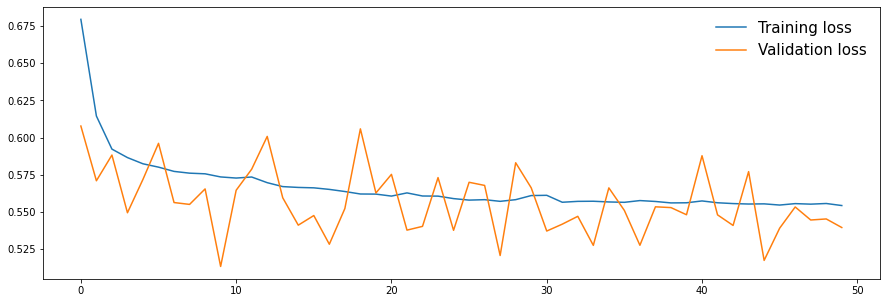

In [48]:


fig = plt.figure(figsize=(15, 5))
plt.plot(train_losses, label='Training loss')
plt.plot(dev_losses, label='Validation loss')
plt.legend(frameon=False, fontsize=15)
plt.show()



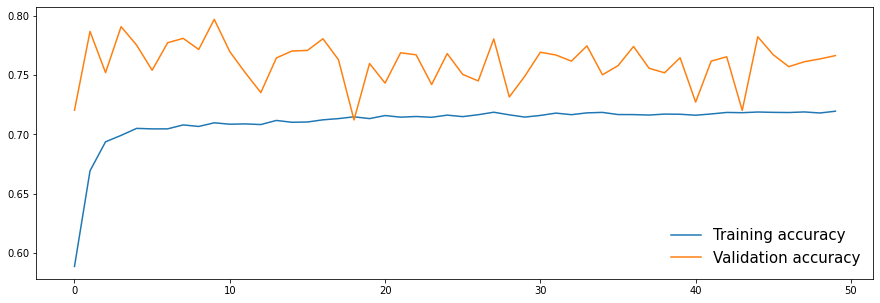

In [49]:
fig = plt.figure(figsize=(15, 5))
plt.plot(train_acc, label="Training accuracy")
plt.plot(dev_acc, label="Validation accuracy")
plt.legend(frameon=False, fontsize=15)
plt.show()
